In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

## Normalize the data

Normalize the data by zeroing the mean and dividing each feature by its standard deviation.

In [ ]:
def normalize(csvfiles):
    fields = ['time', 'yaw', 'pitch', 'roll', 'x', 'y', 'z', 'f1', 't1', 'f2', 't2', 'f3', 't3', 'f4', 't4']
    data = {f:[] for f in fields}
    #fig, ax = plt.subplots(2,3, sharex = True, figsize =(16,8))
    for i, csvfile in enumerate(csvfiles):
        df = pd.read_csv(csvfile,skiprows=[0],delim_whitespace=True, header=None)
        df.columns = fields
        df['time'] = df['time'] * - 1. # reverse negative sign of time
        for j in xrange(6):
            field = fields[j+1]

            # preprocessing
            df[field] = signal.medfilt(df[field],15)    # reduce noise
            #df[field] = df[field][30:]                 # abandon initaial
            if normalize:
                df[field] = df[field] - np.mean(df[field][30:-30]) # normalize

            # store data
            data[field].append(df[field])
            ax[j/3,j%3].plot(df['time'], df[field], label='run{}'.format(i))
            ax[j/3,j%3].set_title(field)
            ax[j/3,j%3].set_xlabel('time')


In [3]:
# define parameters
folder= '../data/07-09-Data' #TODO: enter the relative directory of the file
mode = 'standing'            #TODO: you can switch between walking and standing
normalize = True             #TODO: if you don't want to compensate the bias, use False
if normalize:
    output = 'images/'+mode+'_normalized.jpg'
else:
    output = 'images/'+mode+'_unormalized.jpg'
csvfiles = glob.glob(folder+'/'+mode+'/*.csv')
print '{} files in the folder'.format(len(csvfiles))
for csvfile in csvfiles:
    print csvfile

8 files in the folder
../data/07-09-Data/standing/2017-07-10T07_19_08.286288.csv
../data/07-09-Data/standing/2017-07-10T07_04_28.092699.csv
../data/07-09-Data/standing/2017-07-10T07_16_41.113935.csv
../data/07-09-Data/standing/2017-07-10T07_06_40.900544.csv
../data/07-09-Data/standing/2017-07-10T07_02_17.650401.csv
../data/07-09-Data/standing/2017-07-10T07_05_32.163705.csv
../data/07-09-Data/standing/2017-07-10T07_13_32.050308.csv
../data/07-09-Data/standing/2017-07-10T07_14_33.837638.csv


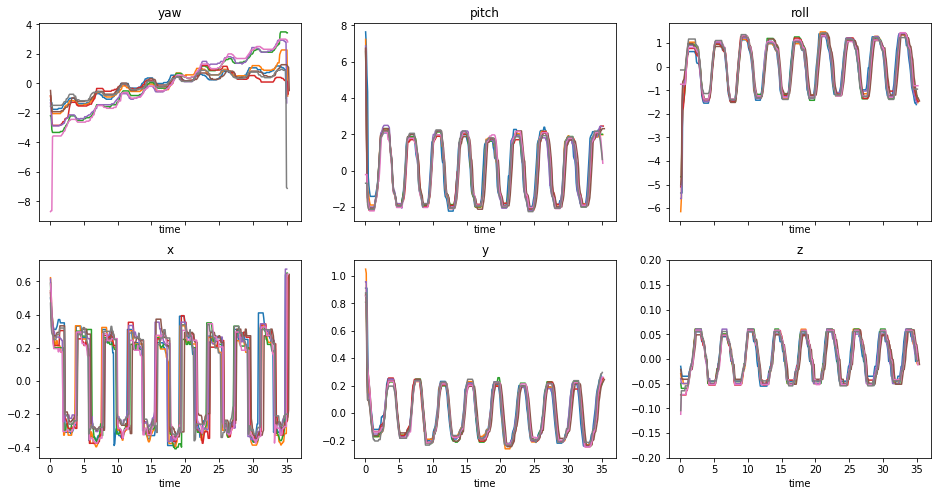

In [4]:
# data processing
fields = ['time', 'yaw', 'pitch', 'roll', 'x', 'y', 'z', 'f1', 't1', 'f2', 't2', 'f3', 't3', 'f4', 't4']
data = {f:[] for f in fields}
fig, ax = plt.subplots(2,3, sharex = True, figsize =(16,8))
for i, csvfile in enumerate(csvfiles):
    #print 'Process {}'.format(csvfile)
    df = pd.read_csv(csvfile,skiprows=[0],delim_whitespace=True, header=None)
    df.columns = fields
    df['time'] = df['time'] * - 1. # reverse negative sign of time
    for j in xrange(6):
        field = fields[j+1]
        
        # preprocessing
        df[field] = signal.medfilt(df[field],15)   # reduce noise
        #df[field] = df[field][30:]                 # abandon initaial
        if normalize:
            df[field] = df[field] - np.mean(df[field][30:-30]) # normalize
        
        # store data
        data[field].append(df[field])
        ax[j/3,j%3].plot(df['time'], df[field], label='run{}'.format(i))
        ax[j/3,j%3].set_title(field)
        ax[j/3,j%3].set_xlabel('time')

ax[1,2].set_ylim([-.2,.2]) # NOTE: z acceleration has very large outliers
plt.savefig(output)
plt.show()

In [7]:
# correlation
#print '{}\tcorrelation\tstd'.format(mode)
print '<table style="width:30%">'
print '  <tr>'
print '    <th>{}</th>'.format(mode)
print '    <th>Correlation</th>'
print '    <th>STD</th>'
print '  </tr>'
for field in fields[1:7]:
    print '  <tr>'
    #cov = np.cov(data[field])      # covariance matrix
    cor = np.corrcoef(data[field])  # correlation matrix
    avg = (np.sum(cor)-len(cor) ) / (len(cor)**2-len(cor))
    std = np.std(data[field])
    
    #print '{}\t{}\t\t{}'.format(field,round(avg,4),round(std,4))
    
    print '    <th>{}</th>'.format(field)
    print '    <td>{}</td>'.format(round(avg,4))
    print '    <td>{}</td>'.format(round(std,4))
    print '  </tr>'
print '</table>'

<table style="width:30%">
  <tr>
    <th>standing</th>
    <th>Correlation</th>
    <th>STD</th>
  </tr>
  <tr>
    <th>yaw</th>
    <td>0.8746</td>
    <td>1.3201</td>
  </tr>
  <tr>
    <th>pitch</th>
    <td>0.9664</td>
    <td>1.6955</td>
  </tr>
  <tr>
    <th>roll</th>
    <td>0.9582</td>
    <td>1.0643</td>
  </tr>
  <tr>
    <th>x</th>
    <td>0.8209</td>
    <td>0.2881</td>
  </tr>
  <tr>
    <th>y</th>
    <td>0.9846</td>
    <td>0.1849</td>
  </tr>
  <tr>
    <th>z</th>
    <td>0.984</td>
    <td>0.042</td>
  </tr>
</table>


## Team Spyndra
#### July 12, 2017

 * Replaced the servo hat and calibrate the hardware
 * Collected standing and walking data off the cords

### Standing
#### Normalized
<img src="images/standing_normalized.jpg" />

### Standing
#### Unormalized
<img src="images/standing_unormalized.jpg" />

### Standing statistics
<table style="width:30%">
  <tr>
    <th>standing</th>
    <th>Correlation</th>
    <th>STD</th>
  </tr>
  <tr>
    <th>yaw</th>
    <td>0.8746</td>
    <td>1.3201</td>
  </tr>
  <tr>
    <th>pitch</th>
    <td>0.9664</td>
    <td>1.6955</td>
  </tr>
  <tr>
    <th>roll</th>
    <td>0.9582</td>
    <td>1.0643</td>
  </tr>
  <tr>
    <th>x</th>
    <td>0.8209</td>
    <td>0.2881</td>
  </tr>
  <tr>
    <th>y</th>
    <td>0.9846</td>
    <td>0.1849</td>
  </tr>
  <tr>
    <th>z</th>
    <td>0.984</td>
    <td>0.042</td>
  </tr>
</table>

### Walking
#### Unormalized
<img src="images/walking_unormalized.jpg" />

### Walking
#### Normalized
<img src="images/walking_normalized.jpg" />

### Walking Statistics
<table style="width:30%">
  <tr>
    <th>walking</th>
    <th>Correlation</th>
    <th>STD</th>
  </tr>
  <tr>
    <th>yaw</th>
    <td>0.3896</td>
    <td>6.5146</td>
  </tr>
  <tr>
    <th>pitch</th>
    <td>0.9263</td>
    <td>3.6387</td>
  </tr>
  <tr>
    <th>roll</th>
    <td>0.8124</td>
    <td>1.9879</td>
  </tr>
  <tr>
    <th>x</th>
    <td>0.8063</td>
    <td>0.7994</td>
  </tr>
  <tr>
    <th>y</th>
    <td>0.8403</td>
    <td>0.3191</td>
  </tr>
  <tr>
    <th>z</th>
    <td>0.5062</td>
    <td>11.4575</td>
  </tr>
</table>